# Import libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



# load the datasets

In [2]:
file_path = "C:/Users/ASUS/Downloads/Churn_Modelling.csv"
df = pd.read_csv(file_path)


In [3]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

# Data Exploration and Preprocessing:

In [4]:
# Check the structure of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Drop irrelevant columns
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

# Split Data into Training and Testing Sets:

In [5]:
X = df.drop('Exited', axis=1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Build and Train the Model 

In [6]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# Evaluate the Model:

In [7]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8665
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



# SHAP (Shapley Additive exPlanations):

In [9]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import shap

# Load the dataset
file_path = "C:/Users/ASUS/Downloads/Churn_Modelling.csv"
data = pd.read_csv(file_path)

# Explore and clean the data (use Excel for initial cleaning if needed)
# ...

# Rename the 'Churn' column to 'Exited'
data = data.rename(columns={'Churn': 'Exited'})

# Define features (X) and target variable (y)
X = data.drop("Exited", axis=1)  # Adjust column name as needed
y = data["Exited"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning using RandomSearch
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_

# Evaluate the best model
accuracy = best_model.score(X_test, y_test)
print(f"Best Model Accuracy: {accuracy:.2f}")

# SHAP (Shapley Additive exPlanations) for feature importance
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X)

# Summary plot of feature importance
shap.summary_plot(shap_values, X, plot_type="bar")

# grid_search.fit(X_train, y_train)
# best_model = grid_search.best_estimator_

# Evaluate the best model
accuracy = best_model.score(X_test, y_test)
print(f"Best Model Accuracy: {accuracy:.2f}")

# SHAP (Shapley Additive exPlanations) for feature importance
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X)

# Summary plot of feature importance
shap.summary_plot(shap_values, X, plot_type="bar")

# Evaluate the best model
accuracy = best_model.score(X_test, y_test)
print(f"Best Model Accuracy: {accuracy:.2f}")

# SHAP (Shapley Additive exPlanations) for feature importance
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X)

# Summary plot of feature importance
shap.summary_plot(shap_values, X, plot_type="bar")


ValueError: 
All the 50 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 345, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1106, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\pandas\core\generic.py", line 2084, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Hsueh'

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 345, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1106, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\pandas\core\generic.py", line 2084, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: "P'an"


In [13]:
print(data.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


Data Visualization

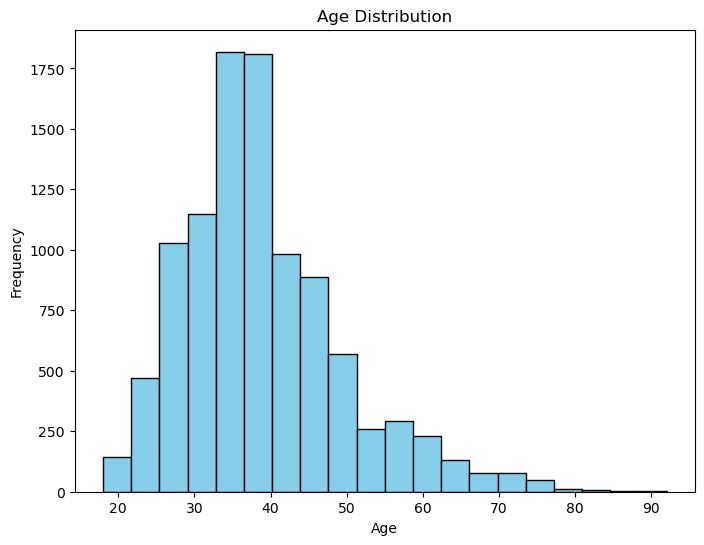

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the dataset

# Histogram for Age Distribution
plt.figure(figsize=(8, 6))
plt.hist(data['Age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

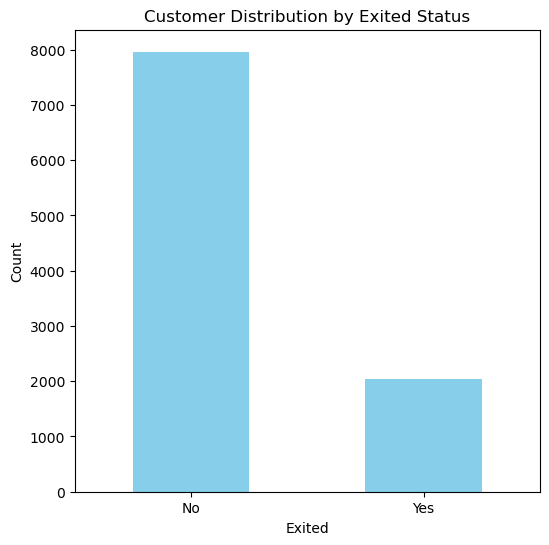

In [23]:
# Bar Chart for Exited
plt.figure(figsize=(6, 6))
data['Exited'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.title('Customer Distribution by Exited Status')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.show()


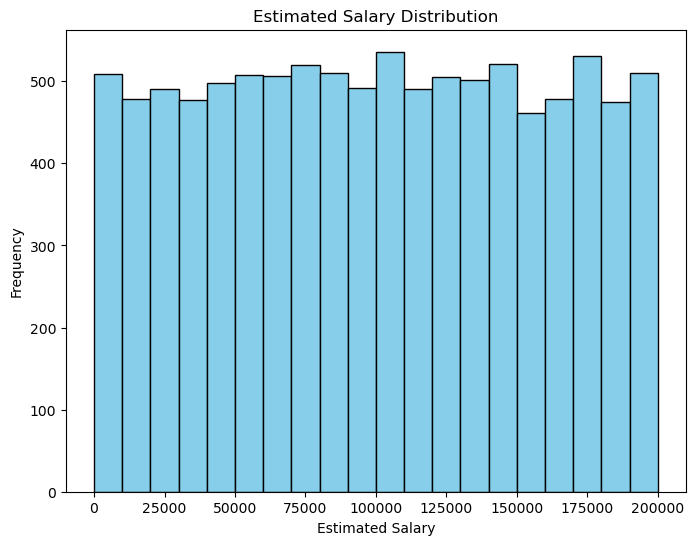

In [24]:
# Histogram for Estimated Salary
plt.figure(figsize=(8, 6))
plt.hist(data['EstimatedSalary'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')
plt.title('Estimated Salary Distribution')
plt.show()


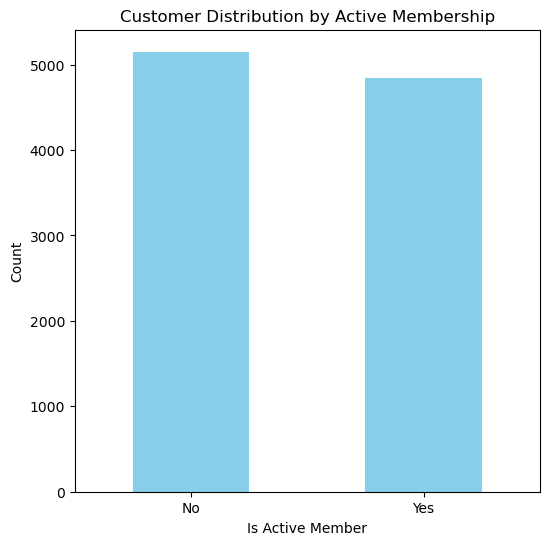

In [25]:
# Bar Chart for IsActiveMember
plt.figure(figsize=(6, 6))
data['IsActiveMember'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Is Active Member')
plt.ylabel('Count')
plt.title('Customer Distribution by Active Membership')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.show()

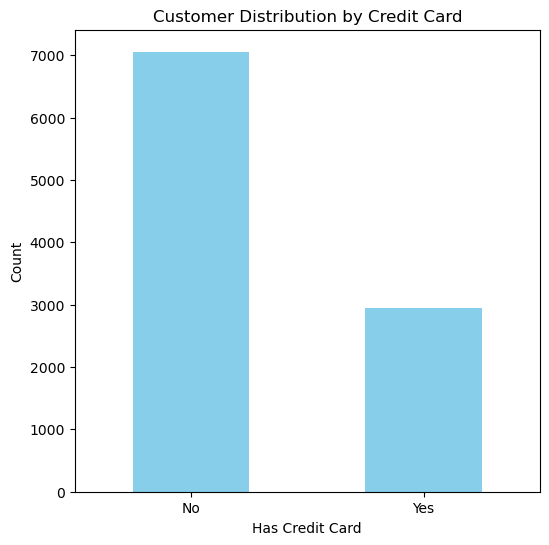

In [27]:
# Bar Chart for Has Credit Card
plt.figure(figsize=(6, 6))
data['HasCrCard'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Has Credit Card')
plt.ylabel('Count')
plt.title('Customer Distribution by Credit Card')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.show()

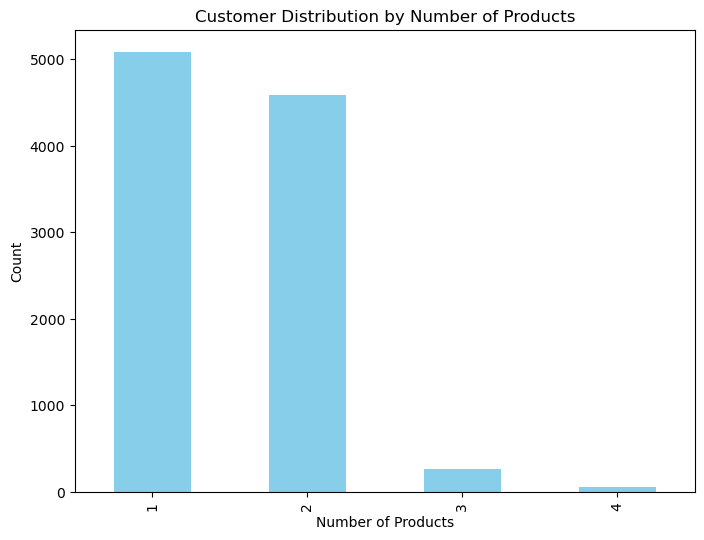

In [28]:
# Bar Chart for Number of Products
plt.figure(figsize=(8, 6))
data['NumOfProducts'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.title('Customer Distribution by Number of Products')
plt.show()


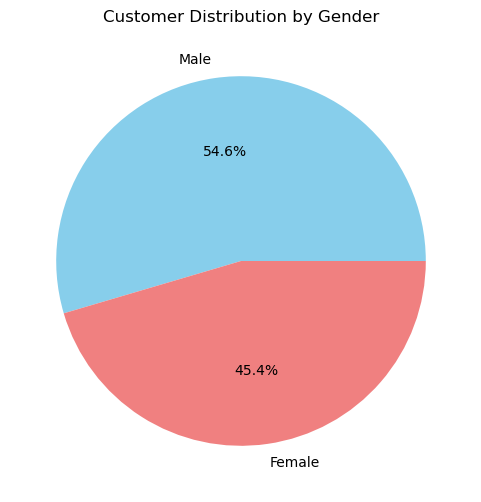

In [29]:
# Pie Chart for Gender
plt.figure(figsize=(6, 6))
data['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Customer Distribution by Gender')
plt.ylabel('')
plt.show()

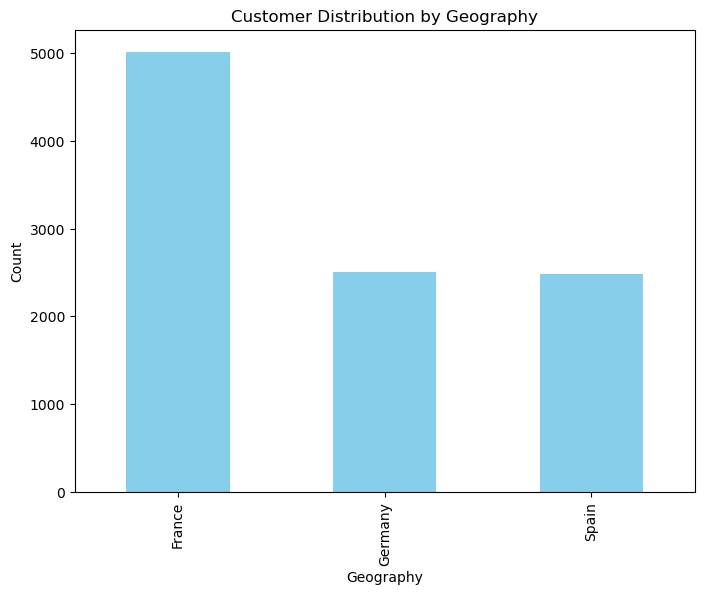

In [30]:
# Bar Chart for Geography
plt.figure(figsize=(8, 6))
data['Geography'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.title('Customer Distribution by Geography')
plt.show()